# Figure 1: Behavior and Neural Discrimination plots

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd
import sys
from pathlib import Path
import os
import pingouin as pg

# Import project specific modules and enable automatic reloading
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as erp
from plotting import Fig, pretty_plot, FigMirror
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc
import helpers

### General helper functions

In [2]:
# Fix for only certain xticks appearing...
def fix_xticks(ax, days_plot = [-2, -1, 4, 1, 2, 7]):
    days_str = [str(e) for e in days_plot]
    plt.sca(ax)
    plt.xticks(list(range(len(days_plot))), days_str)


In [3]:
def get_group(row):
    if row.Mouse in err.learners:
        return "Learners"
    elif row.Mouse in err.nonlearners:
        return "Non-Learners"
    elif row.Mouse in err.ani_mice_good:
        return "ANI"
# get_group(DI_df.iloc[0,:])

### Set up plots

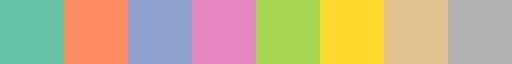

In [4]:
plt.get_cmap('Set2')

[8.5 6.5]


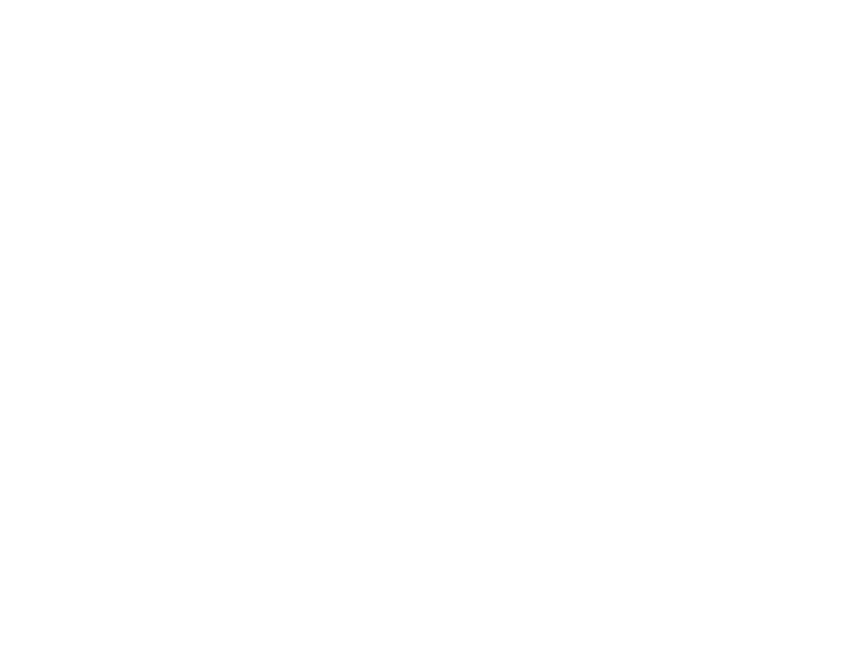

In [5]:
# Set up main figure plotting
%matplotlib ipympl
Fig1 = Fig(num=1, grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(Fig1.fig.get_size_inches())

[8.5 6.5]


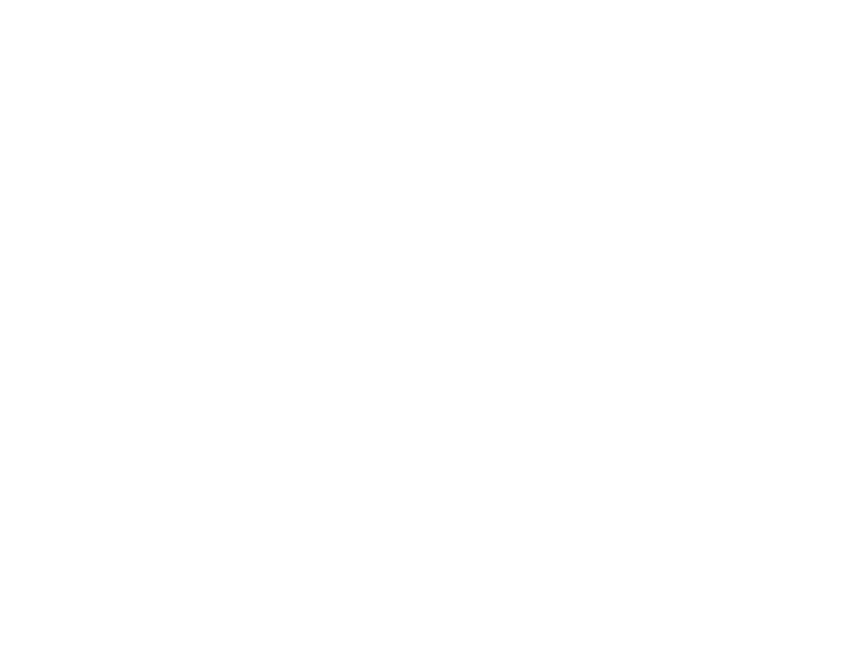

In [6]:
# Set up main figure stats companion plot and mirror it into FigMirror class
Fig1stats = Fig(num='Figure 1 stats', grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(Fig1stats.fig.get_size_inches())
Fig1comb = FigMirror(Fig1, Fig1stats)

[8.5  4.75]
[8.5  4.75]


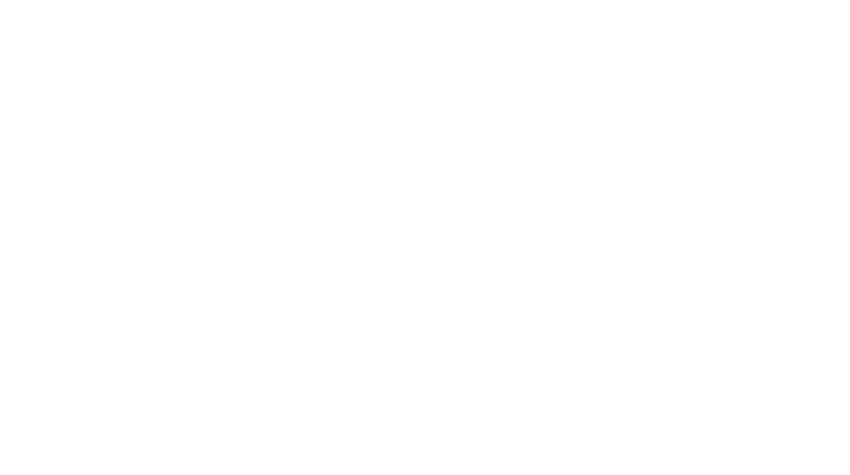

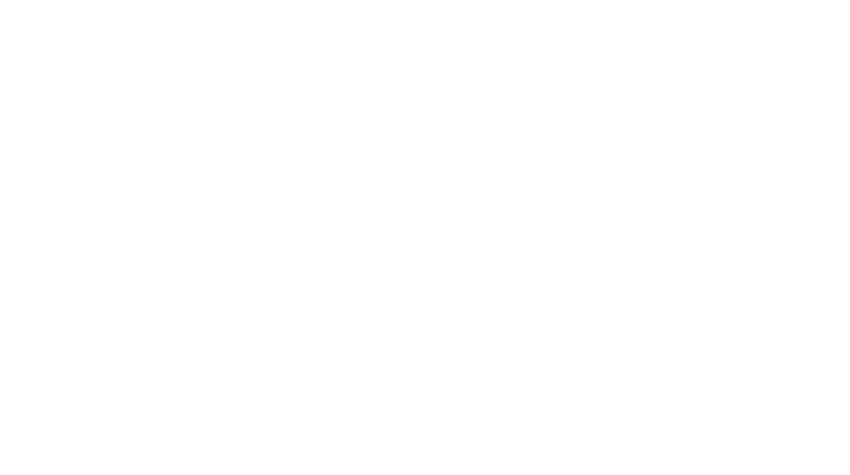

In [7]:
# Set up FigS1 and stats fig for it
FigS1 = Fig(num="Figure S1", grid=(3, 4), size=(8.5, 4.75), fontsize=6)
print(FigS1.fig.get_size_inches())
FigS1stats = Fig(num='Figure S1 stats', grid=(3, 4), size=(8.5, 4.75), fontsize=6)
print(FigS1stats.fig.get_size_inches())
FigS1comb = FigMirror(FigS1, FigS1stats)

In [8]:
# Designate Placeholders
aexp = Fig1.subplot(Fig1.gs[0, 0:2])
aexp.set_title('Exp. Outline Here')
aexp.axis('off')
plt.draw()

## Start with behavioral plots

### S1A - Control mice freezing

In [9]:
# Plot Control mice behavior - dump into supplemental.
axc, astatsc = FigS1comb.subplot(341)
figc, axc, fratio_cont = erp.plot_all_freezing(err.control_mice_good, ax=axc, s=9, xoffset=0.1)
axc.set_ylim([-0.025, 0.80])
axc.set_title('Control')
fix_xticks(axc)
axc.set_xlabel('')
axc.set_xticklabels('')

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180818_1_openfield: nbadpts = 488 max_in_a_row = 82
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, '')]

In [10]:
# Increase in arena-specific freezing from days -2/-1 to days 1/2 is significant for controls
tstatc, ptc = s.ttest_ind((fratio_cont[1, 0:2, :] - fratio_cont[0, 0:2, :]).reshape(-1),
                           (fratio_cont[1, 3:5, :] - fratio_cont[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(ptc/2)
print(tstatc)

# astatsc = Fig1stats.subplot(343)
astatsc.text(0.1, 0.7, 'Control Mice')
astatsc.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsc.text(0.1, 0.5, f'p={ptc/2:0.3g}')
astatsc.text(0.1, 0.4, f'tstat={tstatc:0.3g}')
astatsc.axis('off')

0.03274740104538616
-1.914305360476763


(0.0, 5.0, 0.0, 1.0)

### 1D: ANI Mice freezing

In [11]:
# Plot ANI mice behavior
axa, astatsa = Fig1comb.subplot(447)
figa, axa, fratio_ani = erp.plot_all_freezing(err.ani_mice_good, ax=axa, s=9, xoffset=0.1)
axa.set_ylim([-0.025, 0.80])
fix_xticks(axa)
axa.set_xlabel('')
axa.set_xticklabels('')
axa.set_ylabel('')
axa.set_title('Anisomycin')

/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6


Text(0.5, 1.0, 'Anisomycin')

In [12]:
# Non-significant increase in freezing for ANI mice from before to after (days -2/-1 to days 1/2)
tstata, pta = s.ttest_ind((fratio_ani[1, 0:2, :] - fratio_ani[0, 0:2, :]).reshape(-1),
                           (fratio_ani[1, 3:5, :] - fratio_ani[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(f"Days -2/-1 vs Days 1/2: pval={pta/2:.3g}, tstat={tstata:.3g}")
print(pta/2)
print(tstata)

astatsa.text(0.1, 0.7, 'ANI Mice')
astatsa.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsa.text(0.1, 0.5, f'p={pta/2:0.3g}')
astatsa.text(0.1, 0.4, f'tstat={tstata:0.3g}')

tstata, pta = s.ttest_rel((fratio_ani[1, 1, :] - fratio_ani[0, 1, :]).reshape(-1),
                           (fratio_ani[1, 3, :] - fratio_ani[0, 3, :]).reshape(-1), nan_policy='omit')
astatsa.text(0.1, 0.3, 'paired one-way t-test day -1 to day 1', fontdict=None)
astatsa.text(0.1, 0.2, f"pval={pta/2:.3g}, tstat={tstata:.3g}")
print(f"Day -1 vs Days 1: pval={pta/2:.3g}, tstat={tstata:.3g}")

astatsa.axis('off')

for id, day in zip([4, 5], [2, 7]):
    tstata, pta = s.ttest_rel((fratio_ani[1, 1, :] - fratio_ani[0, 1, :]).reshape(-1),
                               (fratio_ani[1, id, :] - fratio_ani[0, id, :]).reshape(-1), nan_policy='omit')
    print(f"Day -1 to Day {day} one-way t-test un-paired: pval={pta/2:.3g}, tstat={tstata:.3g}")

Days -2/-1 vs Days 1/2: pval=0.112, tstat=-1.26
0.11178530200553742
-1.2605402424159724
Day -1 vs Days 1: pval=0.219, tstat=-0.859
Day -1 to Day 2 one-way t-test un-paired: pval=0.253, tstat=-0.729
Day -1 to Day 7 one-way t-test un-paired: pval=0.0601, tstat=-1.97


### Calculate Discrimination indices
Also peform sanity checks

In [13]:
# Calculate Discrimination Index (DI) ratios for day 1-2
learning_cutoff = -0.35

# Controls
DI_aft = ((fratio_cont[0, 3:5, :] - fratio_cont[1, 3:5, :]).reshape(-1))/((fratio_cont[0, 3:5, :] + 
                                                                           fratio_cont[1, 3:5, :]).reshape(-1))
# ANI - not used due to this being a poor metric if animals don't freeze a lot, only good for specifying
# how specific a memory is in mice that actually freeze.  See next block.
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

In [14]:
# Here are all the DIs for controls averaged across days 1 and 2 - note that this metric can distort things as 
# animal 3, for example, freezes very little in either arena and so is a non-learner even though he has a lower DI
# value, while animal 1 and animal 3 freeze in both arenas and are also a non-learner.
DI_aft.reshape(fratio_cont[1, 3:5, :].shape).mean(axis=0)

array([-0.10379693, -0.39033887, -0.21642609, -0.59563518,         nan,
       -0.71391564, -0.36638349, -0.06170731])

In [15]:
# Sanity checks
from itertools import compress
# Print out learners vs. non-learners
learn_bool = DI_aft.reshape(fratio_cont[1, 3:5, :].shape).mean(axis=0) < learning_cutoff
# learners = err.control_mice_good[learn_bool]
learners = list(compress(err.control_mice_good, learn_bool))
nonlearners = list(compress(err.control_mice_good, ~learn_bool))
print('Learners')
print(learners)
# Check that matches what's in your code
print(err.learners)

# Note that Marble 14 can't really be designated either way since his open field behavioral data was corrupted on
# those days. However, he would likely be a non-learner since he barely freezes in the shock arena after shock.
print('Non-Learners')
print(nonlearners)
# Check that matches what's in your code
print(err.nonlearners)

Learners
['Marble07', 'Marble12', 'Marble24', 'Marble27']
['Marble07', 'Marble12', 'Marble24', 'Marble27']
Non-Learners
['Marble06', 'Marble11', 'Marble14', 'Marble29']
['Marble06', 'Marble11', 'Marble29']


### 1B-C: Learner and Non-Learner freezing plots

In [16]:
# Plot non-learners and learners
axlrn, astatslrn = Fig1comb.subplot(443)
_, axlrn, fratio_lrn = erp.plot_all_freezing(err.learners, ax=axlrn, s=9, xoffset=0.1)
axlrn.set_title('Learners')
axlrn.set_ylim([-0.025, 0.80])

axnlrn, astatsnl = Fig1comb.subplot(444)
_, axnlrn, fratio_nl = erp.plot_all_freezing(err.nonlearners, ax=axnlrn, s=9, xoffset=0.1)
axnlrn.set_ylim([-0.025, 0.80])
axnlrn.set_ylabel('')
axnlrn.set_title('Non-Learners')

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session


Text(0.5, 1.0, 'Non-Learners')

In [17]:
# Highly sig freezing for Learners
tstatlrn, ptlrn = s.ttest_ind((fratio_lrn[1, 0:2, :] - fratio_lrn[0, 0:2, :]).reshape(-1),
                           (fratio_lrn[1, 3:5, :] - fratio_lrn[0, 3:5, :]).reshape(-1), nan_policy='omit')

print(f"Days -2/-1 Learners one-way t-test un-paired: pval={ptlrn/2:.3g}, tstat={tstatlrn:.3g}")

astatslrn.text(0.1, 0.7, 'Learners')
astatslrn.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatslrn.text(0.1, 0.5, f'p={ptlrn/2:0.3g}')
astatslrn.text(0.1, 0.4, f'tstat={tstatlrn:0.3g}')

tstatlrn, ptlrn = s.ttest_rel((fratio_lrn[1, 1, :] - fratio_lrn[0, 1, :]).reshape(-1),
                           (fratio_lrn[1, 3, :] - fratio_lrn[0, 3, :]).reshape(-1), nan_policy='omit')
print(f"Day -1 to Day 1 one-way t-test un-paired: pval={ptlrn/2:.3g}, tstat={tstatlrn:.3g}")
astatslrn.text(0.1, 0.3, 'paired one-way t-test day -1 to days 1', fontdict=None)
astatslrn.text(0.1, 0.2, f"pval={ptlrn/2:.3g}, tstat={tstatlrn:.3g}")

for id, day in zip([4, 5], [2, 7]):
    tstatlrn, ptlrn = s.ttest_rel((fratio_lrn[1, 1, :] - fratio_lrn[0, 1, :]).reshape(-1),
                               (fratio_lrn[1, id, :] - fratio_lrn[0, id, :]).reshape(-1), nan_policy='omit')
    print(f"Day -1 to Day {day} one-way t-test un-paired: pval={ptlrn/2:.3g}, tstat={tstatlrn:.3g}")

astatslrn.axis('off')

Days -2/-1 Learners one-way t-test un-paired: pval=1.3e-05, tstat=-6.13
Day -1 to Day 1 one-way t-test un-paired: pval=0.00045, tstat=-13.4
Day -1 to Day 2 one-way t-test un-paired: pval=0.0127, tstat=-4.15
Day -1 to Day 7 one-way t-test un-paired: pval=0.0611, tstat=-2.14


(0.0, 1.0, 0.0, 1.0)

In [18]:
# Non-sig freezing for NonLearners
tstatnl, ptnl = s.ttest_ind((fratio_nl[1, 0:2, :] - fratio_nl[0, 0:2, :]).reshape(-1),
                           (fratio_nl[1, 3:5, :] - fratio_nl[0, 3:5, :]).reshape(-1), nan_policy='omit')

print(f"Days -2/-1 to 1/2 Non-Learners one-way t-test un-paired: pval={ptnl/2:.3g}, tstat={tstatnl:.3g}")

astatsnl.text(0.1, 0.7, 'Non-Learners')
astatsnl.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsnl.text(0.1, 0.5, f'p={ptnl/2:0.3g}')
astatsnl.text(0.1, 0.4, f'tstat={tstatnl:0.3g}')

yoff = 0.3
for id, day in zip([3, 4, 5], [1, 2, 7]):
    tstatnl, ptnl = s.ttest_ind((fratio_nl[1, 1, :] - fratio_nl[0, 1, :]).reshape(-1),
                           (fratio_nl[1, id, :] - fratio_nl[0, id, :]).reshape(-1), nan_policy='omit')
    astatsnl.text(0.1, yoff, f"Day -1 to {day} Non-Learners one-way t-test un-paired: pval={ptnl/2:.3g}, tstat={tstatnl:.3g}")
    yoff -= 0.1
    print(f"Day -1 to {day} Non-Learners one-way t-test un-paired: pval={ptnl/2:.3g}, tstat={tstatnl:.3g}")

astatsnl.axis('off')

Days -2/-1 to 1/2 Non-Learners one-way t-test un-paired: pval=0.171, tstat=0.997
Day -1 to 1 Non-Learners one-way t-test un-paired: pval=0.179, tstat=1.04
Day -1 to 2 Non-Learners one-way t-test un-paired: pval=0.302, tstat=0.561
Day -1 to 7 Non-Learners one-way t-test un-paired: pval=0.429, tstat=-0.194


(0.0, 1.0, 0.0, 1.0)

In [19]:
## Run stats - group of interests are Learners vs. ANI, other comparisons included for completeness.
pval_bwgroup_1sidedt_specific = np.ones(6)*np.nan
pval_ani_nl_1sidedt_specific = np.ones(6)*np.nan
pval_lrn_nl_1sidedt_specific = np.ones(6)*np.nan
pval_bwgroup_1sidedt_shockonly = np.ones(6)*np.nan # bw lrn and ani directly, no accounting for specificity
for id in range(0, 6):
    
    # ANI vs Learners
    stats, pval = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_lrn[1, id, :].reshape(-1) - fratio_lrn[0, id, :].reshape(-1),
                              nan_policy='omit')
    
    # ANI vs Non-Learners
    stats_nla, pval_nla = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_nl[1, id, :].reshape(-1) - fratio_nl[0, id, :].reshape(-1),
                              nan_policy='omit')
    
    # Learners vs Non-Learners
    stats_lrnnl, pval_lrnnl = s.ttest_ind(fratio_nl[1, id, :].reshape(-1) - fratio_nl[0, id, :].reshape(-1),
                              fratio_lrn[1, id, :].reshape(-1) - fratio_lrn[0, id, :].reshape(-1),
                              nan_policy='omit')
    

    statss, pvals = s.ttest_ind(fratio_ani[1, id, :], fratio_lrn[1, id, :], nan_policy='omit')
    pval_bwgroup_1sidedt_shockonly[id] = pvals/2

    # Hypothesis is that ani freezing is less than control guys relative to neutral arena
    # So if ani guys mean freezing relative to shock is < 0 (i.e. if stats < 0), divide the pvalue by 2
    # If it's actually larger, then test fails and p = 1-pval/2
    if stats < 0:
        pval_bwgroup_1sidedt_specific[id] = pval/2
    elif stats > 0:
        pval_bwgroup_1sidedt_specific[id] = 1 - pval/2
        
    if stats_nla < 0:
        pval_ani_nl_1sidedt_specific[id] = pval_nla/2
    elif stats_nla > 0:
        pval_ani_nl_1sidedt_specific[id] = 1 - pval_nla/2
       
    if stats_lrnnl < 0:
        pval_lrn_nl_1sidedt_specific [id] = pval_lrnnl/2
    elif stats_lrnnl > 0:
        pval_lrn_nl_1sidedt_specific [id] = 1 - pval_lrnnl/2


In [20]:
# Add between group stats to stats figure
abw_grp_stats = Fig1stats.subplot(Fig1stats.gs[0, 0:2])
days = [-2, -1, 4, 1, 2, 7]
abw_grp_stats.text(0.1, 0.8, '1-sided t-test bw groups')
abw_grp_stats.text(0.1, 0.7, 'Learners v ANI shock arena only')
abw_grp_stats.text(0.1, 0.6, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_bwgroup_1sidedt_shockonly)])

abw_grp_stats.text(0.1, 0.5, 'ANI vs Non-learners shock-open freezing')
abw_grp_stats.text(0.1, 0.4, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_ani_nl_1sidedt_specific)])

abw_grp_stats.text(0.1, 0.3, 'Non-Learners vs. Learners')
abw_grp_stats.text(0.1, 0.2, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_lrn_nl_1sidedt_specific)])

Text(0.1, 0.2, "['-2: p=0.894', '-1: p=0.747', '4: p=0.22', '1: p=0.00391', '2: p=0.0267', '7: p=0.657']")

### 1E and S1C: DI between arena same day vs. within arena across days relationship (S1C at one day lag)

In [10]:
# Get overlap ratios and DIs for all sessions days -2/-1 and days 1/2
overlap_win_all, overlap_bw_all = [], []
DI_win_all, DI_bw_all, mouse_all, did_all = [], [], [], []
day_pairs = [[-2, -1], [1, 2]]
for mouse in err.all_mice_good:
    # Get turnover between arenas on days -2 and -1 and average them
    # o_bw_temp = []
    # o_win_temp = []
    # DI_bw_temp, DI_win_temp = [], []
    for idd, days in enumerate(day_pairs):
        o_bw_temp, DI_bw_temp = [], []
        for day in days:
            _, _, oboth, _, _ = pfs.get_overlap(mouse, 'Open', day, 'Shock', day, batch_map=True)
            o_bw_temp.append(oboth)
            DIneurons = discr.get_DI_scores(mouse, 'Open', day, 'Shock', day, batch_map_use=True)
            DI_bw_temp.append(np.mean(np.abs(DIneurons)))
        overlap_bw_all.append(np.nanmean(o_bw_temp))
        DI_bw_all.append(np.nanmean(DI_bw_temp))

        # Get turnover within each arena from days -2 to -1 and average them
        o_win_temp, DI_win_temp = [], []
        for arena in ['Shock', 'Open']:
            _, _, oboth, _, _ = pfs.get_overlap(mouse, arena, days[0], arena, days[1], 
                                                                 batch_map=True)
            o_win_temp.append(oboth)
            DIneurons = discr.get_DI_scores(mouse, 'Open', days[0], 'Shock', days[1], batch_map_use=True)
            DI_win_temp.append(np.mean(np.abs(DIneurons)))
        overlap_win_all.append(np.nanmean(o_win_temp))
        DI_win_all.append(np.nanmean(DI_win_temp))
        mouse_all.append(mouse)
        did_all.append(idd)
        
ax_olap_t_v_arena, ax_olap_t_v_arena_stats = FigS1comb.subplot(345)
ax_olap_t_v_arena.plot(overlap_win_all, overlap_bw_all, '.')
ax_olap_t_v_arena.set_ylabel('Cell Overlap w/in arenas (1 day lag)')
ax_olap_t_v_arena.set_xlabel('Cell Overlap b/w arenas (same day)')
sns.despine(ax=ax_olap_t_v_arena)

ax_DI_t_v_arena, ax_DI_t_v_arena_stats = Fig1comb.subplot(448)
ax_DI_t_v_arena.plot(DI_win_all, DI_bw_all, '.')
ax_DI_t_v_arena.set_ylabel(r"$\overline{|DI_{neural}|}$ Arena")
ax_DI_t_v_arena.set_xlabel(r"$\overline{|DI_{neural}|}$ Time")
sns.despine(ax=ax_DI_t_v_arena)

DIvsdf = pd.DataFrame({"Mouse": mouse_all, "day_id": did_all, "DI_win": DI_win_all, "DI_bw": DI_bw_all})
olapvsdf = pd.DataFrame({"Mouse": mouse_all, "day_id": did_all, "olap_win": overlap_win_all, "olap_bw": overlap_bw_all})

placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow
placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow
placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow
placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow


/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_37278/530287383.py:18: RuntimeWarning: Mean of empty slice
  DI_bw_all.append(np.nanmean(DI_bw_temp))


placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow
placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow
placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow


/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_37278/530287383.py:29: RuntimeWarning: Mean of empty slice
  DI_win_all.append(np.nanmean(DI_win_temp))


#### Stats

Old method - combine all points (multiple points for each mouse included, n.g.)

In [11]:
# Super significant correlation with all the points
r, p = s.stats.spearmanr(overlap_win_all, overlap_bw_all)
print('\033[4mSpearman Correlation (overlap ratio) \033[0m')
print('r = ' + str(r))
print('p = ' + str(p))
ax_olap_t_v_arena_stats.text(0.1, 0.9, '\033[4mSpearman Correlation (overlap ratio) \033[0m')
ax_olap_t_v_arena_stats.text(0.1, 0.8, 'r = ' + str(r))
ax_olap_t_v_arena_stats.text(0.1, 0.7, 'p = ' + str(p))
sns.despine(ax=ax_olap_t_v_arena_stats)

rdi, pdi = s.stats.spearmanr(np.array(DI_win_all)[~np.isnan(DI_win_all)], np.array(DI_bw_all)[~np.isnan(DI_win_all)])
print('\033[4mSpearman Correlation (DI ratio) \033[0m')
print('r = ' + str(rdi))
print('p = ' + str(pdi))
ax_DI_t_v_arena_stats.text(0.1, 0.9, '\033[4mSpearman Correlation (DI ratio) \033[0m')
ax_DI_t_v_arena_stats.text(0.1, 0.8, 'r = ' + str(rdi))
ax_DI_t_v_arena_stats.text(0.1, 0.7, 'p = ' + str(pdi))

Spearman Correlation (overlap ratio) 
r = 0.8147008547008547
p = 4.058278462992159e-07
Spearman Correlation (DI ratio) 
r = 0.816923076923077
p = 6.288362327910512e-07


/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_37278/2893604544.py:2: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  r, p = s.stats.spearmanr(overlap_win_all, overlap_bw_all)
/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_37278/2893604544.py:11: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  rdi, pdi = s.stats.spearmanr(np.array(DI_win_all)[~np.isnan(DI_win_all)], np.array(DI_bw_all)[~np.isnan(DI_win_all)])


Text(0.1, 0.7, 'p = 6.288362327910512e-07')

OK - take each day independently

Very significant each day.

In [12]:
for did in DIvsdf.day_id.unique():
    print(pg.pairwise_corr(data=DIvsdf[DIvsdf.day_id == did], columns=["DI_win", "DI_bw"]))

        X      Y   method alternative   n         r         CI95%     p-unc  \
0  DI_win  DI_bw  pearson   two-sided  13  0.908133  [0.71, 0.97]  0.000018   

       BF10     power  
0  1180.473  0.998397  
        X      Y   method alternative   n         r         CI95%    p-unc  \
0  DI_win  DI_bw  pearson   two-sided  12  0.697848  [0.21, 0.91]  0.01162   

    BF10     power  
0  6.114  0.762743  


Best - run Linear Mixed Model
dependent variable = DI/olap between days
Fixed effect = DI/olap within days (same arena)
Random effect = day pair (before or after learning)

Also significant.

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
md = smf.mixedlm("DI_win ~ DI_bw", DIvsdf[~np.isnan(DIvsdf.DI_bw)], groups=DIvsdf[~np.isnan(DIvsdf.DI_bw)].Mouse)
mdf = md.fit()
ax_olap_t_v_arena_stats.text(0.1, 0.9, "DI win vs b/w stats below")
ax_olap_t_v_arena_stats.text(0.1, 0.8, mdf.summary())
ax_olap_t_v_arena_stats.text(0.1, 0.7, "pvalues below")
ax_olap_t_v_arena_stats.text(0.1, 0.4, mdf.pvalues)
print(mdf.summary())
print(mdf.pvalues)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DI_win 
No. Observations: 25      Method:             REML   
No. Groups:       13      Scale:              0.0003 
Min. group size:  1       Log-Likelihood:     53.9516
Max. group size:  2       Converged:          Yes    
Mean group size:  1.9                                
-----------------------------------------------------
             Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept    0.094    0.063 1.481 0.139 -0.030  0.218
DI_bw        0.766    0.181 4.232 0.000  0.411  1.121
Group Var    0.000    0.024                          

Intercept    0.138529
DI_bw        0.000023
Group Var    0.386983
dtype: float64


/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


#### Same for overlap

In [14]:
for did in olapvsdf.day_id.unique():
    print(pg.pairwise_corr(data=olapvsdf[olapvsdf.day_id == did], columns=["olap_win", "olap_bw"]))

          X        Y   method alternative   n         r         CI95%  \
0  olap_win  olap_bw  pearson   two-sided  13  0.738998  [0.32, 0.92]   

      p-unc    BF10    power  
0  0.003901  14.399  0.87017  
          X        Y   method alternative   n         r         CI95%  \
0  olap_win  olap_bw  pearson   two-sided  13  0.733363  [0.31, 0.91]   

      p-unc    BF10     power  
0  0.004336  13.228  0.861603  


In [15]:
md = smf.mixedlm("olap_win ~ olap_bw", olapvsdf[~np.isnan(olapvsdf.olap_bw)], groups=olapvsdf[~np.isnan(olapvsdf.olap_bw)].Mouse)
mdf = md.fit()
ax_DI_t_v_arena_stats.text(0.1, 0.9, "olap win vs b/w stats below")
ax_DI_t_v_arena_stats.text(0.1, 0.8, mdf.summary())
ax_DI_t_v_arena_stats.text(0.1, 0.7, "pvalues below")
ax_DI_t_v_arena_stats.text(0.1, 0.4, mdf.pvalues)
print(mdf.summary())
print(mdf.pvalues)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: olap_win
No. Observations: 26      Method:             REML    
No. Groups:       13      Scale:              0.0027  
Min. group size:  2       Log-Likelihood:     30.8031 
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.054    0.049 1.088 0.276 -0.043  0.151
olap_bw       0.942    0.133 7.062 0.000  0.681  1.204
Group Var     0.002    0.038                          

Intercept    2.764864e-01
olap_bw      1.642382e-12
Group Var    2.988743e-01
dtype: float64


/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


## DI ratio plots by group

In [16]:
# Calculate DI ratio for all groups
DI_lrn = (fratio_lrn[0] - fratio_lrn[1])/(fratio_lrn[0] + fratio_lrn[1])
DI_nl = (fratio_nl[0] - fratio_nl[1])/(fratio_nl[0] + fratio_nl[1])
DI_a = (fratio_ani[0] - fratio_ani[1])/(fratio_ani[0] + fratio_ani[1])
# Dump into nice dataframe
days = [-2, -1, 4, 1, 2, 7]
DI_all = []
days_all = []
grp_all = []
for DI, grp in zip([DI_lrn, DI_nl, DI_a], ['Learners', 'Non-Learners', 'ANI']):
    DI_all.extend(DI.reshape(-1))
    grp_all.extend([grp for _ in DI.reshape(-1)])
    days_all.extend(np.matlib.repmat(days, DI.shape[1], 1).T.reshape(-1))

DIdf = pd.DataFrame({'DI': DI_all, 'Day': days_all, 'Group': grp_all})

NameError: name 'fratio_lrn' is not defined

### Code/functions to get spatial information for all mice

In [17]:
def calc_DI(df_day, neutral_name: str in ["Open", "Neutral"] = "Neutral"):
    frz_neutral = df_day[df_day["Arena"] == neutral_name]["Frz. Ratio"].values[0]
    frz_shock = df_day[df_day["Arena"] == "Shock"]["Frz. Ratio"].values[0]
    DI = (frz_neutral - frz_shock) / (frz_neutral + frz_shock)
    
    return DI

In [18]:
def create_DI_df(fratio_df_in, neutral_name: str in ["Open", "Neutral"] = "Neutral", alpha_pf: float = 0.05):
    """Takes freeze ratio dataframe and converts it to a DataFrame with DI values + mean SI and event rate
    for that mouse in each arena.
    alpha_pf: all cells with p < alpha_pf are considered place fields"""

    # Add in Discrimination Index
    DI_df = fratio_df_in.groupby(["Mouse", "Day"], observed=False).apply(calc_DI, include_groups=False).reset_index()
    DI_df = DI_df.rename(columns={0: "DI"})

    # Loop through and get event rate and mutual information
    mi_shock, mi_open, mi_pf_shock, mi_pf_open = [], [], [], []
    er_shock, er_open = [], []
    di_neural, olap_neural = [], []
    for idr, row in DI_df.iterrows():
        if not np.isnan(row.DI):
            # Get spatial information and event rate in shock arena
            pfos = pf.load_pf(row["Mouse"], 'Shock', row["Day"])
            mi_s, _, _, _, _ = pf.spatinfo(pfos.tmap_us, pfos.runoccmap, pfos.PSAbool_align)
            mi_shock.append(np.nanmean(mi_s))
            mi_pf_shock.append(np.nanmean(np.array(mi_s)[np.array(pfos.pval) < alpha_pf]))
            event_rate_s, even_prob_s = helpers.get_eventrate(pfos.PSAbool_align, pfos.sr_image)
            er_shock.append(np.nanmean(event_rate_s))
        
            pfoo = pf.load_pf(row["Mouse"], 'Open', row["Day"])
            mi_o, _, _, _, _ = pf.spatinfo(pfoo.tmap_us, pfoo.runoccmap, pfoo.PSAbool_align)
            mi_open.append(np.nanmean(mi_o))
            mi_pf_open.append(np.nanmean(np.array(mi_o)[np.array(pfoo.pval) < alpha_pf]))
            event_rate_o, even_prob_o = helpers.get_eventrate(pfoo.PSAbool_align, pfoo.sr_image)
            er_open.append(np.nanmean(event_rate_o))

            di_neural_temp = discr.get_DI_scores(row["Mouse"], 'Open', row["Day"], 'Shock', row["Day"])
            _, _, overlap, _, _ = pfs.get_overlap(row["Mouse"], 'Shock', row["Day"], 'Open', row["Day"])
            di_neural.append(np.mean(np.abs(di_neural_temp)))
            olap_neural.append(overlap)
        else:
            mi_shock.append(np.nan)
            mi_pf_shock.append(np.nan)
            er_shock.append(np.nan)
            mi_open.append(np.nan)
            mi_pf_open.append(np.nan)
            er_open.append(np.nan)
            di_neural.append(np.nan)
            olap_neural.append(np.nan)
        
    DI_df["MI All (Neutral)"] = mi_open
    DI_df["MI All (Shock)"] = mi_shock
    DI_df["MI PF (Neutral)"] = mi_pf_open
    DI_df["MI PF (Shock)"] = mi_pf_shock
    DI_df["Event Rate (Neutral)"] = er_open
    DI_df["Event Rate (Shock)"] = er_shock
    DI_df["DI Neural"] = di_neural
    DI_df["Overlap Ratio"] = olap_neural

    return DI_df
fratio_all = erp.get_all_freezing(err.learners, day_des=[-2, -1, 1, 2], arenas=["Open", "Shock"])
fratio_df = erp.fratio_to_df(fratio_all, err.learners, days=[-2, -1, 1, 2], arenas=["Neutral", "Shock"])
DI_df = create_DI_df(fratio_df)
DI_df.sample(5)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: invalid value encountered in multiply
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: Runtim

,Mouse,Day,DI,MI All (Neutral),MI All (Shock),MI PF (Neutral),MI PF (Shock),Event Rate (Neutral),Event Rate (Shock),DI Neural,Overlap Ratio
7,Marble12,2,-0.653413,0.020984,0.012693,0.030266,0.018787,1.502071,1.384034,0.347446,0.160752
4,Marble12,-2,-0.405267,0.023364,0.014847,0.029246,0.021897,1.488422,1.339608,0.333681,0.386935
9,Marble24,-1,-0.574889,0.012427,0.010184,0.020389,0.014092,1.203631,0.906509,0.378595,0.247126
13,Marble27,-1,-0.672042,0.017436,0.014415,0.026087,0.023343,1.427099,1.389527,0.305392,0.464646
2,Marble07,1,-0.468069,0.015860,0.010895,0.023303,0.018024,1.671730,1.477026,0.347513,0.374841


### For reference only: Plot session means for reference - use hierarchical bootstrapping for final plots.
In `behavioral_and_neural_discrimination_bootstrap.ipynb`

In [33]:
alpha_pf = 0.05
days = [-2, -1, 4, 1, 2, 7]
DI_df = []
for mice, group_name in zip((err.learners, err.nonlearners, err.ani_mice_good),
                             ("Learners", "Non-Learners", "ANI")):
    fratio_all = erp.get_all_freezing(mice, day_des=days, arenas=["Open", "Shock"])
    fratio_df = erp.fratio_to_df(fratio_all, mice, days=days, arenas=["Neutral", "Shock"])
    df_temp = create_DI_df(fratio_df)
    df_temp["Group"] = group_name
    DI_df.append(df_temp)
DI_df = pd.concat(DI_df, axis=0).reset_index()
DI_df["Day"] = pd.Categorical(DI_df["Day"], [-2, -1, 4, 1, 2, 7])
DI_df.sample(5)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: invalid value encountered in multiply
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: Runtim

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: invalid value encountered in multiply
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarn

/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: invalid value encountered in multiply
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: Runtim

,index,Mouse,Day,DI,MI All (Neutral),MI All (Shock),MI PF (Neutral),MI PF (Shock),Event Rate (Neutral),Event Rate (Shock),DI Neural,Overlap Ratio,Group
49,7,Marble18,-1,0.166396,0.018858,0.015783,0.026882,0.023792,1.376102,1.396078,0.332633,0.314741,ANI
8,8,Marble12,1,-0.559866,0.020085,0.012422,0.029383,0.018925,1.394127,1.430898,0.389342,0.272973,Learners
53,11,Marble18,7,0.061440,0.019841,0.013992,0.027616,0.023159,1.826329,1.492567,0.362588,0.209486,ANI
15,15,Marble24,2,-0.624174,0.017014,0.012637,0.024161,0.018101,2.148563,1.744165,0.381655,0.286846,Learners
26,2,Marble06,1,-0.123637,0.015425,0.013237,0.025811,0.022974,1.230374,1.421399,0.365441,0.247934,Non-Learners


<Axes: xlabel='Group', ylabel='DI'>

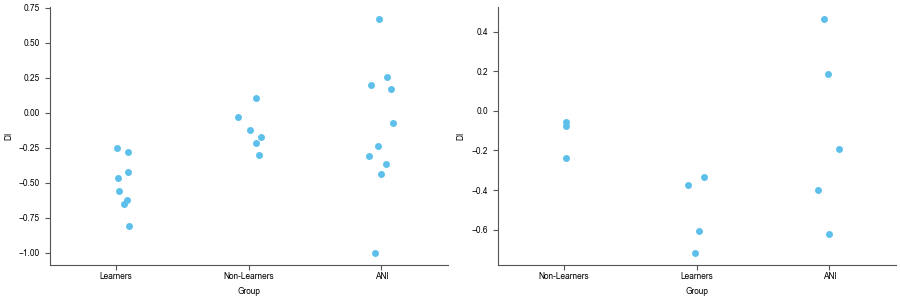

In [34]:
_, ax = plt.subplots(1, 2, figsize=(9, 3))
sns.stripplot(data=DI_df[(DI_df.Day == 1) | (DI_df.Day == 2)], x="Group", y="DI", ax=ax[0])
df_aft_mean = DI_df[(DI_df.Day == 1) | (DI_df.Day == 2)].groupby("Mouse").mean(numeric_only=True).reset_index()
df_aft_mean["Group"] = df_aft_mean.apply(get_group, axis=1)
sns.stripplot(data=df_aft_mean, x="Group", y="DI", ax=ax[1])

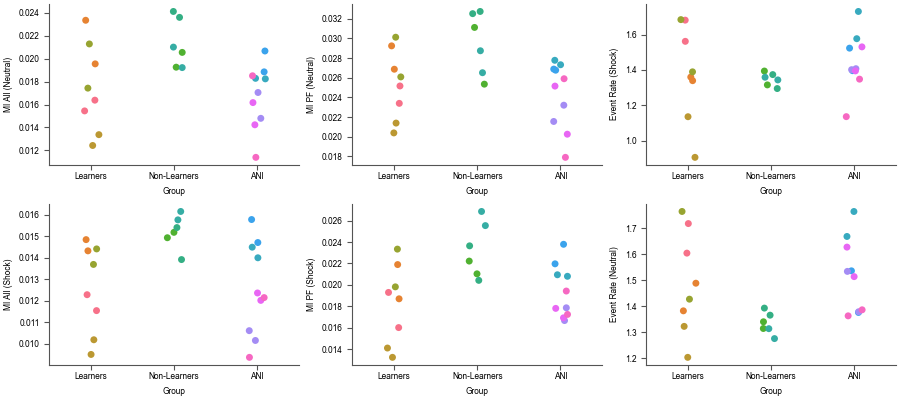

In [37]:
df_use = DI_df[(DI_df.Day == -2) | (DI_df.Day == -1)]
_, ax = plt.subplots(2, 3, figsize=(9, 4))
for a, col in zip(ax.T.reshape(-1), ["MI All (Neutral)", "MI All (Shock)", "MI PF (Neutral)",
                                     "MI PF (Shock)", "Event Rate (Shock)", "Event Rate (Neutral)"]):
    sns.stripplot(data=df_use, x="Group", y=col, hue="Mouse", ax=a, legend=False)

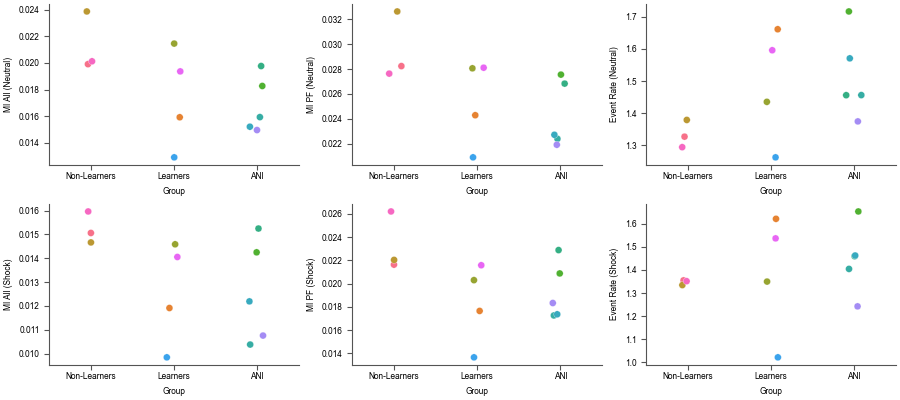

In [38]:
df_use = DI_df[(DI_df.Day == -2) | (DI_df.Day == -1)].groupby(["Mouse"]).mean(numeric_only=True).reset_index().drop(columns="index")
df_use["Group"] = df_use.apply(get_group, axis=1)
_, ax = plt.subplots(2, 3, figsize=(9, 4))
for a, col in zip(ax.T.reshape(-1), ["MI All (Neutral)", "MI All (Shock)", "MI PF (Neutral)",
                                     "MI PF (Shock)", "Event Rate (Neutral)", "Event Rate (Shock)"]):
    sns.stripplot(data=df_use, x="Group", y=col, hue="Mouse", ax=a, legend=False, edgecolor="w",
                  linewidth=0.2)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Group,ANI,Learners,False,True,-1.042742,12.061788,two-sided,0.317518,0.317518,holm,0.598,-0.490873
1,Group,ANI,Non-Learners,False,True,2.115540,11.624346,two-sided,0.056701,0.113403,holm,1.696,1.003894
2,Group,Learners,Non-Learners,False,True,2.630351,11.734640,two-sided,0.022315,0.066944,holm,3.037,1.243012


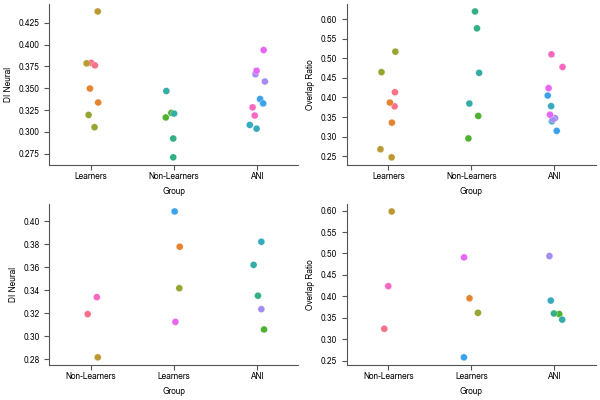

In [39]:
_, ax = plt.subplots(2, 2, figsize=(6, 4))

df_use = DI_df[(DI_df.Day == -2) | (DI_df.Day == -1)]

for a, col in zip(ax[0], ["DI Neural", "Overlap Ratio"]):
    sns.stripplot(data=df_use, x="Group", y=col, hue="Mouse", ax=a, legend=False, edgecolor="w",
                  linewidth=0.2)
    
df_use = df_use.groupby(["Mouse"]).mean(numeric_only=True).reset_index().drop(columns="index")
df_use["Group"] = df_use.apply(get_group, axis=1)
for a, col in zip(ax[1], ["DI Neural", "Overlap Ratio"]):
    sns.stripplot(data=df_use, x="Group", y=col, hue="Mouse", ax=a, legend=False, edgecolor="w",
                  linewidth=0.2)

df_use = DI_df[(DI_df.Day == -2) | (DI_df.Day == -1)]
import pingouin as pg
pg.pairwise_tests(data=df_use, dv="DI Neural", between="Group", padjust="holm")
# pg.anova(data=df_use, dv="DI Neural", between="Group")

### 1G: Make behavioral breakdown plots showing DI is different between Learners and Non-Learners/ANI
Note that this is by definition.

In [30]:
DIdf_list = []
for mice, gname in zip([err.learners, err.nonlearners, err.ani_mice_good], ["Learners", "Non-Learners", "ANI"]):
    fratio_all = erp.get_all_freezing(mice, day_des=[-2, -1, 1, 2, 7], arenas=["Open", "Shock"])
    fratio_df = erp.fratio_to_df(fratio_all, mice, days=[-2, -1, 1, 2, 7], arenas=["Neutral", "Shock"])
    DI_df = create_DI_df(fratio_df)
    DI_df["Group"] = gname
    DIdf_list.append(DI_df)
DIdf = pd.concat(DIdf_list, axis=0).reset_index()

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: invalid value encountered in multiply
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: Runtim

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: invalid value encountered in multiply
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarn

/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: invalid value encountered in multiply
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: Runtim

In [21]:
axDIaft, axDIaft_stats = Fig1comb.subplot([Fig1.gs[2, 2], Fig1stats.gs[2, 2]])
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2))]
sns.stripplot(x='Group', y='DI', data=DIaft, ax=axDIaft, palette='Set2', size=3)
axDIaft.set_title('After: Days 1 and 2')
axDIaft.set_ylabel('$DI_{beh}$')

/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_37278/720791049.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='DI', data=DIaft, ax=axDIaft, palette='Set2', size=3)


Text(0, 0.5, '$DI_{beh}$')

Run stats on this plot

In [41]:
tstat_aft_ln, p_aft_ln = s.ttest_ind(DIaft[DIaft.Group == 'Learners'].DI, DIaft[DIaft.Group == 'Non-Learners'].DI)
tstat_aft_la, p_aft_la = s.ttest_ind(DIaft[DIaft.Group == 'Learners'].DI, DIaft[DIaft.Group == 'ANI'].DI)
tstat_aft_na, p_aft_na = s.ttest_ind(DIaft[DIaft.Group == 'Non-Learners'].DI, DIaft[DIaft.Group == 'ANI'].DI)

axDIaft_stats = Fig1stats.subplot(346)
groups = ['L v NL', 'L v ANI', 'NL v ANI']
axDIaft_stats.text(0.1, 0.7, '1-sided t-test DIbehavior bw groups days 1 and 2 All POINTS (Old method, not used)')

# Old method - use all points, not good
ytext = 0.6
for grp, tstat, p in zip(groups, [tstat_aft_ln, tstat_aft_la, tstat_aft_na], [p_aft_ln, p_aft_la, p_aft_na]):
    puse = p/2 if tstat < 0 else 1 - p/2
    axDIaft_stats.text(0.1, ytext, f'{grp}: p={puse:0.3g} w/tstat={tstat:0.3g}')
    ytext -= 0.1

# new method: use mean values for each mouse
DIaft = DI_df[((DI_df['Day'] == 1) | (DI_df['Day'] == 2))]
DIaft_mean = DIaft.drop(columns=["Day", "index"]).groupby(["Group", "Mouse"]).mean().reset_index()

axDIaft_stats.text(0.1, 0.4, '1-sided t-test DIbehavior bw groups days 1 and 2 MEAN (New method, used)')
axDIaft_stats.text(0.1, 0.1, pg.pairwise_tests(data=DIaft_mean, between="Group", dv="DI"))

Text(0.1, 0.1, '  Contrast         A             B  Paired  Parametric         T       dof  \\\n0    Group       ANI      Learners   False        True  1.827626  5.598042   \n1    Group       ANI  Non-Learners   False        True  0.048804  4.643388   \n2    Group  Learners  Non-Learners   False        True -3.558076  4.709881   \n\n  alternative     p-unc   BF10    hedges  \n0   two-sided  0.120897  1.202  0.997886  \n1   two-sided  0.963104  0.532  0.023911  \n2   two-sided  0.017968  3.783 -2.084618  ')

### Calculations: Get cell overlap between arenas for each day and dump into DI dataframe.

In [42]:
days = [-2, -1, 4, 1, 2, 7]
mice_grp = [err.learners, err.nonlearners, err.ani_mice_good]
overlaps_all = []
for mice in mice_grp:
    grp_overlaps = []
    for mouse in mice:
        mouse_overlaps = []
        for day in days:
            _, _, overlap, _, _ = pfs.get_overlap(mouse, 'Shock', day, 'Open', day)
            mouse_overlaps.append(overlap)
        grp_overlaps.append(mouse_overlaps)
    overlaps_all.append(np.asarray(grp_overlaps).T)

# Now build up in same way as above for consistency
olap_list = []
for olap, grp in zip(overlaps_all, ['Learners', 'Non-Learners', 'ANI']):
    olap_list.extend(olap.reshape(-1))
DIdf.insert(2, 'Cell Overlap', olap_list)

placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow


In [43]:
# Calculate neural discrimination index

days = [-2, -1, 4, 1, 2, 7]
mice_grp = [err.learners, err.nonlearners, err.ani_mice_good]
discr_all = []
mouse_name = []
for mice in mice_grp:
    grp_discr = []
    for mouse in mice:
        mouse_discr = []
        for day in days:
            DIneurons = discr.get_DI_scores(mouse, 'Open', day, 'Shock', day)
            mouse_discr.append(np.mean(np.abs(DIneurons)))
            mouse_name.append(mouse)
        grp_discr.append(mouse_discr)
    discr_all.append(np.asarray(grp_discr).T)

# Now build up in same way as above for consistency
DImean_list = []
for DImean, grp in zip(discr_all, ['Learners', 'Non-Learners', 'ANI']):
    DImean_list.extend(DImean.reshape(-1))
DIdf.insert(3, '|DI|mean', DImean_list)

### 1H (Original submittal): Plot DIneuron by group BEFORE shock

#### Old Method - many data points aren't independent
kept for reference since included in first submittal

In [44]:
axDIbef, axDIbef_stats = Fig1comb.subplot([Fig1.gs[2, 3], Fig1stats.gs[2, 3]])
DIbef = DIdf[((DIdf['Day'] == -2) | (DIdf['Day'] == -1))]
sns.stripplot(x='Group', y='|DI|mean', data=DIbef, ax=axDIbef, palette='Set2', size=3)
fix_xticks(axDIbef,['Learners', 'Non-Learners', 'ANI'])
axDIbef.set_title('Before: Days -2 and -1')
axDIbef.set_ylabel(r"$\overline{|DI_{neural}|}$")

/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_14420/2837610223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='|DI|mean', data=DIbef, ax=axDIbef, palette='Set2', size=3)


Text(0, 0.5, '$\\overline{|DI_{neural}|}$')

In [45]:
# axDIbef_stats = Fig1stats.subplot(Fig1stats.gs[2, 1])
statb_ln, pb_ln = s.ttest_ind(DIbef[DIbef.Group == 'Non-Learners']['|DI|mean'], 
                              DIbef[DIbef.Group == 'Learners']['|DI|mean'])
statb_an, pb_an = s.ttest_ind(DIbef[DIbef.Group == 'ANI']['|DI|mean'], 
                              DIbef[DIbef.Group == 'Non-Learners']['|DI|mean'])
statb_la, pb_la = s.ttest_ind(DIbef[DIbef.Group == 'ANI']['|DI|mean'],
                              DIbef[DIbef.Group == 'Learners']['|DI|mean'])

axDIbef_stats.text(0.1, 0.8, 'two-sided t-test abs(DIneural)_mean BEFORE shock days')
axDIbef_stats.text(0.1, 0.7, f'NL vs. L p={pb_ln:0.3g} w/tstat={statb_ln:0.3g}')
axDIbef_stats.text(0.1, 0.6, f'NL vs. ANI p={pb_an:0.3g} w/tstat={statb_an:0.3g}')
axDIbef_stats.text(0.1, 0.5, f'ANI vs. L p={pb_la:0.3g} w/tstat={statb_la:0.3g}')
print(pb_ln)
print(pb_an)
print(pb_la)

0.030118915965494437
0.05890575797380454
0.2933162083583539


### 1H: Correct method - uses hierarchical bootstrapping
See 'behavior_and_neural_discrimination_bootstrap.ipynb'

### 1I: Plot DIneural v DIbehavior for AFTER sessions.

#### Play around with different ways of visualizing (all points, mean, etc.)

In [46]:
plt.rcParams["font.size"] = 6

In [ ]:
ax

/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_37278/346635658.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()


<Axes: xlabel='DI', ylabel='DI Neural'>

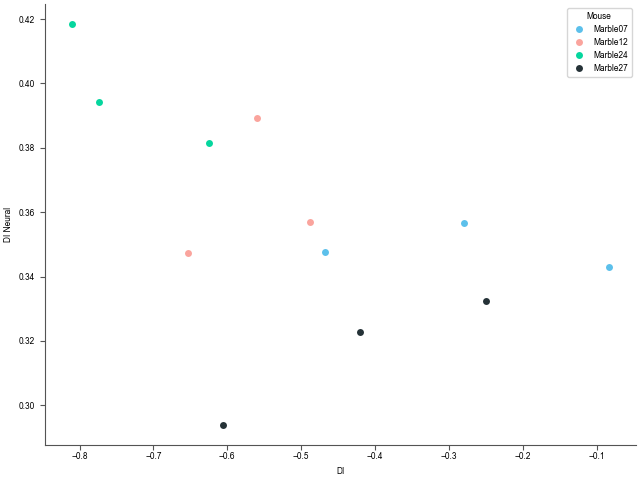

In [48]:
_, ax = plt.subplots()
DIaft = DIdf[DIdf.Day > 0]
sns.stripplot(data=DIaft[DIaft.Group == "Learners"], x="DI", y="DI Neural", hue="Mouse", native_scale=True, ax=ax)

#### Try Linear Mixed Effects Model

Taks home is that there is probably not enough data points to swing an LME model...

Both DI Neural vs. DI and Overlap Ratio vs DI. appear to be significant, but lots of warnings. Warrants further investigation.

In [46]:
from copy import deepcopy
import statsmodels.api as sm
import statsmodels.formula.api as smf
DIaft2 = deepcopy(DIaft)
DIaft2 = DIaft2.rename(columns={"DI Neural": "DI_Neural"})
md = smf.mixedlm("DI ~ DI_Neural", DIaft2[DIaft2.Group != "ANI"], groups=DIaft2[DIaft2.Group != "ANI"]["Mouse"])
mdf = md.fit(reml=False)
print(mdf.summary())
print(mdf.pvalues)

       Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DI    
No. Observations: 14      Method:             ML    
No. Groups:       7       Scale:              0.0178
Min. group size:  2       Log-Likelihood:     2.3182
Max. group size:  2       Converged:          Yes   
Mean group size:  2.0                               
----------------------------------------------------
          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------
Intercept -0.073    0.671 -0.108 0.914 -1.387  1.242
DI_Neural -0.770    1.896 -0.406 0.684 -4.486  2.945
Group Var  0.041    0.305                           

Intercept    0.913725
DI_Neural    0.684438
Group Var    0.317611
dtype: float64


In [76]:
from copy import deepcopy
import statsmodels.api as sm
import statsmodels.formula.api as smf
DIaft = DI_df[(DI_df['Day'] == 1) | (DI_df['Day'] == 2) | (DI_df['Day'] == 7) ]
DIaft2 = deepcopy(DIaft)
DIaft2 = DIaft2[~np.isnan(DIaft2.DI)]
DIaft2 = DIaft2.rename(columns={"DI Neural": "DI_Neural"})
md = smf.mixedlm("DI ~ DI_Neural", DIaft2[DIaft2.Group == "Non-Learners"], groups="Mouse")
mdf = md.fit(reml=False)
print(mdf.summary())
print(mdf.pvalues)

       Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DI    
No. Observations: 8       Method:             ML    
No. Groups:       3       Scale:              0.0181
Min. group size:  2       Log-Likelihood:     4.4263
Max. group size:  3       Converged:          No    
Mean group size:  2.7                               
----------------------------------------------------
          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------
Intercept -0.325    0.365 -0.890 0.373 -1.040  0.390
DI_Neural  0.596    1.084  0.549 0.583 -1.529  2.721
Mouse Var  0.001                                    

Intercept    0.373428
DI_Neural    0.582675
Mouse Var         NaN
dtype: float64


/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

In [57]:
# probably not ok because it doesn't converge
md.score(mdf.params_object)

array([-0.08645968])

In [60]:
from copy import deepcopy
import statsmodels.api as sm
import statsmodels.formula.api as smf
DIaft = DI_df[(DI_df['Day'] == 1) | (DI_df['Day'] == 2) | (DI_df['Day'] == 7) ]
DIaft2 = deepcopy(DIaft)
DIaft2 = DIaft2[~np.isnan(DIaft2.DI)]
DIaft2 = DIaft2.rename(columns={"DI Neural": "DI_Neural"})
md = smf.mixedlm("DI ~ DI_Neural", DIaft2[DIaft2.Group == "Learners"], groups="Mouse")
mdf = md.fit(reml=False)
print(mdf.summary())
print(mdf.pvalues)

       Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DI    
No. Observations: 12      Method:             ML    
No. Groups:       4       Scale:              0.0258
Min. group size:  3       Log-Likelihood:     3.7584
Max. group size:  3       Converged:          Yes   
Mean group size:  3.0                               
----------------------------------------------------
          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------
Intercept  0.415    0.793  0.523 0.601 -1.140  1.970
DI_Neural -2.566    2.215 -1.159 0.247 -6.908  1.775
Mouse Var  0.007    0.104                           

Intercept    0.600912
DI_Neural    0.246612
Mouse Var    0.688408
dtype: float64


/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [61]:
# Variance parameter is small and finite so the above convergence warning is probably ok according 
# to https://github.com/statsmodels/statsmodels/issues/6157
md.score(mdf.params_object)

array([0.0001171])

Now look at overlap ratio vs DI - it's a trend with the mixed LM for Learners.

However, it doesn't converge for Non-Learners...

In [69]:
from copy import deepcopy
import statsmodels.api as sm
import statsmodels.formula.api as smf
DIaft = DI_df[(DI_df['Day'] == 1) | (DI_df['Day'] == 2) | (DI_df['Day'] == 7) ]
DIaft2 = deepcopy(DIaft)
DIaft2 = DIaft2[~np.isnan(DIaft2.DI)]
DIaft2 = DIaft2.rename(columns={"Overlap Ratio": "Overlap_Ratio"})
md = smf.mixedlm("DI ~ Overlap_Ratio", DIaft2[DIaft2.Group == "Learners"], groups="Mouse")
mdf = md.fit(reml=False)
print(mdf.summary())
print(mdf.pvalues)

         Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  DI    
No. Observations:   12       Method:              ML    
No. Groups:         4        Scale:               0.0236
Min. group size:    3        Log-Likelihood:      4.4896
Max. group size:    3        Converged:           Yes   
Mean group size:    3.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -0.963    0.250 -3.850 0.000 -1.453 -0.473
Overlap_Ratio  1.458    0.770  1.894 0.058 -0.051  2.966
Mouse Var      0.005    0.079                           

Intercept        0.000118
Overlap_Ratio    0.058186
Mouse Var        0.686414
dtype: float64


/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [68]:
# Variance parameter is small and finite so the above convergence warning is probably ok according 
# to https://github.com/statsmodels/statsmodels/issues/6157
md.score(mdf.params_object)

array([-6.60332478e-05])

In [73]:
from copy import deepcopy
import statsmodels.api as sm
import statsmodels.formula.api as smf
DIaft = DI_df[(DI_df['Day'] == 1) | (DI_df['Day'] == 2) | (DI_df['Day'] == 7) ]
DIaft2 = deepcopy(DIaft)
DIaft2 = DIaft2[~np.isnan(DIaft2.DI)]
DIaft2 = DIaft2.rename(columns={"Overlap Ratio": "Overlap_Ratio"})
md = smf.mixedlm("DI ~ Overlap_Ratio", DIaft2[DIaft2.Group == "Non-Learners"], groups="Mouse")
mdf = md.fit(reml=True)
print(mdf.summary())
print(mdf.pvalues)

         Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  DI    
No. Observations:   8        Method:              REML  
No. Groups:         3        Scale:               0.0232
Min. group size:    2        Log-Likelihood:      2.9333
Max. group size:    3        Converged:           No    
Mean group size:    2.7                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.016    0.192  0.085 0.932 -0.360  0.393
Overlap_Ratio -0.387    0.497 -0.779 0.436 -1.362  0.587
Mouse Var      0.001                                    

Intercept        0.932379
Overlap_Ratio    0.435820
Mouse Var             NaN
dtype: float64


/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

Combining controls into one group also reveals ambiguous results...

In [81]:
from copy import deepcopy
import statsmodels.api as sm
import statsmodels.formula.api as smf
DIaft = DI_df[(DI_df['Day'] == 1) | (DI_df['Day'] == 2) | (DI_df['Day'] == 7) ]
DIaft2 = deepcopy(DIaft)
DIaft2 = DIaft2[~np.isnan(DIaft2.DI)]
DIaft2 = DIaft2.rename(columns={"Overlap Ratio": "Overlap_Ratio"})
md = smf.mixedlm("DI ~ Overlap_Ratio", DIaft2[DIaft2.Group != "ANI"], groups="Mouse")
# md = smf.mixedlm("DI ~ DI_Neural", DIaft2[DIaft2.Group == "Learners"], groups="Mouse")
mdf = md.fit()
print(mdf.summary())
print(mdf.pvalues)

         Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  DI    
No. Observations:   20       Method:              REML  
No. Groups:         7        Scale:               0.0257
Min. group size:    2        Log-Likelihood:      1.9098
Max. group size:    3        Converged:           Yes   
Mean group size:    2.9                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -0.494    0.312 -1.583 0.113 -1.105  0.117
Overlap_Ratio  0.456    0.887  0.514 0.607 -1.283  2.194
Mouse Var      0.051    0.284                           

Intercept        0.113314
Overlap_Ratio    0.607416
Mouse Var        0.262461
dtype: float64


In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
DIaft2 = DIaft2.rename(columns={"DI Neural": "DI_Neural", "Overlap Ratio": "Overlap_Ratio"})
DIaft3 = DIaft2[(DIaft2.Day == 1) | (DIaft2.Day == 2)]
md = smf.mixedlm("DI ~ DI_Neural", DIaft3[DIaft3.Group == "Learners"], groups="Mouse")
# md = smf.mixedlm("DI ~ DI_Neural", DIaft3[DIaft3.Group != "ANI"], groups="Mouse")
mdf = md.fit(reml=False)
mdf.summary()

/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
       Mixed Linear Model Regression Results
====================================================
Model:            MixedLM Dependent Variable: DI    
No. Observations: 8       Method:             ML    
No. Groups:       4       Scale:              0.0148
Min. group size:  2       Log-Likelihood:     5.4980
Max. group size:  2       Converged:          Yes   
Mean group size:  2.0                               
----------------------------------------------------
          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------
Intercept  1.083    0.270  4.013 0.000  0.554  1.611
DI_Neural -4.394    0.736 -5.973 0.000 -5.837 -2.952
Mouse Var  0.000                                    
====================================================

"""

In [88]:
md.score(mdf.params_object)

array([-0.00777448])

In [83]:
md = smf.mixedlm("DI ~ Overlap_Ratio", DIaft2[DIaft2.Group == "Learners"], groups=DIaft2[DIaft2.Group == "Learners"]["Mouse"])
mdf = md.fit(reml=False)
mdf.summary()

/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:              MixedLM  Dependent Variable:  DI    
No. Observations:   8        Method:              ML    
No. Groups:         4        Scale:               0.0151
Min. group size:    2        Log-Likelihood:      5.4231
Max. group size:    2        Converged:           Yes   
Mean group size:    2.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -1.031    0.204 -5.056 0.000 -1.431 -0.632
Overlap_Ratio  1.685    0.642  2.625 0.009  0.427  2.942
Group Var      0.000    0.083                           
========================================================

"""

#### Plots here

In [89]:
axDIvDI, axDIvDIstats = Fig1comb.subplot([Fig1.gs[3, 2], Fig1stats.gs[3, 2]])
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2) | (DIdf['Day'] == 7))]
sns.scatterplot(x='DI', y='|DI|mean', data=DIaft[DIaft.Group != 'ANI'], hue='Group', ax=axDIvDI,
                size=2, palette='Set2', legend=False)
axDIvDI.set_xlabel(r"$DI_{beh}$")
axDIvDI.set_ylabel(r"$\overline{|DI_{neural}|}$")

Text(0, 0.5, '$\\overline{|DI_{neural}|}$')

Get Stats and plot regression lines over actual plot

In [90]:
# axDIvDIstats = Fig1stats.subplot(Fig1stats.gs[2, 2])
cmap_use = plt.get_cmap('Set2')

# Learners
corr_lrn, p_corr_lrn = s.spearmanr(DIaft[DIaft.Group == 'Learners']['DI'], 
                                   DIaft[DIaft.Group == 'Learners']['|DI|mean'])
lrn_lreg = s.linregress(DIaft[DIaft.Group == 'Learners']['DI'], DIaft[DIaft.Group == 'Learners']['|DI|mean'])
lrn_range = np.array([np.min(DIaft[DIaft.Group == 'Learners']['DI']), 
                      np.max(DIaft[DIaft.Group == 'Learners']['DI'])])
axDIvDI.plot(lrn_range, lrn_range*lrn_lreg.slope + lrn_lreg.intercept, linestyle='-', color=cmap_use.colors[0])
axDIvDIstats.text(0.1, 0.7, 'Spearman rho for DIneural vs DIbeh')
axDIvDIstats.text(0.1, 0.6, f'Learners rho={corr_lrn:0.3g}, pval={p_corr_lrn:0.3g}')

# Non-Learners             
corr_nl, p_corr_nl = s.spearmanr(DIaft[DIaft.Group == 'Non-Learners']['DI'], 
                                   DIaft[DIaft.Group == 'Non-Learners']['|DI|mean'], nan_policy='omit')
df_aftnl = DIaft[DIaft.Group == 'Non-Learners'][~DIaft[DIaft.Group == 'Non-Learners']['DI'].isna()]  # Remove nan
nl_lreg = s.linregress(df_aftnl['DI'], df_aftnl['|DI|mean'])
nl_range = np.array([np.min(df_aftnl['DI']), np.max(df_aftnl['DI'])])
axDIvDI.plot(nl_range, nl_range*nl_lreg.slope + nl_lreg.intercept, linestyle='-', color=cmap_use.colors[1])
axDIvDIstats.text(0.1, 0.5, f'Non-Learners rho={corr_nl:0.3g}, pval={p_corr_nl:0.3g}')

print(p_corr_lrn)
print(p_corr_nl)

0.05858947538856761
0.8665262706759089


### 1I: Overlap ratio vs DI behavior

In [91]:
axolapvDI, axolapvDIstats = Fig1comb.subplot([Fig1.gs[3, 3], Fig1stats.gs[3, 3]])
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2) | (DIdf['Day'] == 7))]
sns.scatterplot(x='DI', y='Cell Overlap', data=DIaft[DIaft.Group != 'ANI'], hue='Group', ax=axolapvDI, 
                palette='Set2', size=1, legend=False)
axolapvDI.set_xlabel(r"$DI_{beh}$")
axolapvDI.set_ylabel("Overlap Ratio b/w arenas")

Text(0, 0.5, 'Overlap Ratio b/w arenas')

In [92]:
# Stats for overlap v DI
# axolapvDIstats = Fig1stats.subplot(Fig1stats.gs[2, 3])

# Learners
olap_corr_lrn, p_olap_corr_lrn = s.spearmanr(DIaft[DIaft.Group == 'Learners']['DI'], 
                                   DIaft[DIaft.Group == 'Learners']['Cell Overlap'])
lrn_olap_lreg = s.linregress(DIaft[DIaft.Group == 'Learners']['DI'], DIaft[DIaft.Group == 'Learners']['Cell Overlap'])
lrn_olap_range = np.array([np.min(DIaft[DIaft.Group == 'Learners']['DI']), 
                      np.max(DIaft[DIaft.Group == 'Learners']['DI'])])
axolapvDI.plot(lrn_olap_range, lrn_olap_range*lrn_olap_lreg.slope + lrn_olap_lreg.intercept, 
               linestyle='-', color=cmap_use.colors[0])
axolapvDIstats.text(0.1, 0.7, 'Spearman rho for olap vs DIbeh')
axolapvDIstats.text(0.1, 0.6, f'Learners rho={olap_corr_lrn:0.3g}, pval={p_olap_corr_lrn:0.3g}')

# Non-Learners
df_aftnl = DIaft[DIaft.Group == 'Non-Learners'][~DIaft[DIaft.Group == 'Non-Learners']['DI'].isna()]  # Remove nan
olap_corr_nl, p_olap_corr_nl = s.spearmanr(df_aftnl['DI'], df_aftnl['Cell Overlap'], nan_policy='omit')
nl_olap_lreg = s.linregress(df_aftnl['DI'], df_aftnl['Cell Overlap'])
nl_olap_range = np.array([np.min(df_aftnl['DI']), np.max(df_aftnl['DI'])])
axolapvDI.plot(nl_olap_range, nl_olap_range*nl_olap_lreg.slope + nl_olap_lreg.intercept, 
               linestyle='-', color=cmap_use.colors[1])
axolapvDIstats.text(0.1, 0.5, f'Non-Learners rho={olap_corr_nl:0.3g}, pval={p_olap_corr_nl:0.3g}')

print(olap_corr_lrn)
print(p_olap_corr_lrn)
print(olap_corr_nl)
print(p_olap_corr_nl)

0.6153846153846154
0.03316990109010588
-0.2142857142857143
0.6103444156452669


### Finally generate some example traces of on/off neurons and highly discriminative neurons

In [93]:
import scipy.io as sio
traces = []
for arena in ['Open', 'Shock']:
    dir_use = pf.get_dir('Marble11', arena, -1)
    im_data_file = path.join(dir_use, 'FinalOutput.mat')
    im_data = sio.loadmat(im_data_file)
    traces.append(im_data['NeuronTraces'])

traces_o = traces[0][0,0].squeeze()[0]
traces_s = traces[1][0,0].squeeze()[0]

For notebook only - as a reference to make sure sorting is working properly (it is!)

<Axes: >

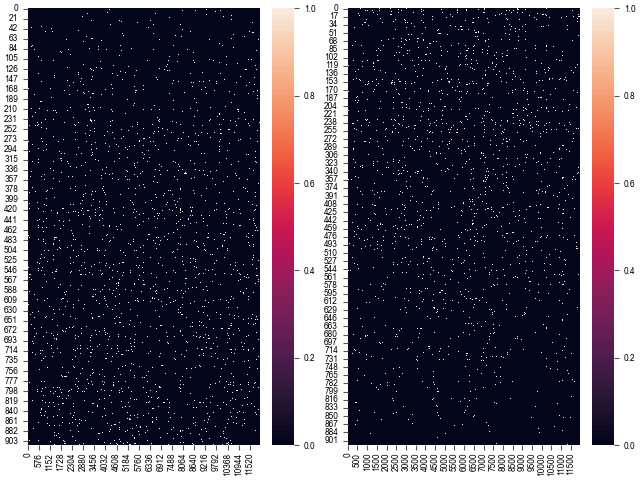

In [94]:
_, axtest = plt.subplots(1, 2)
day = -1

# Import calcium activity
traces_o, psa_o = trc.load_traces('Marble11', 'Open', day, psa=True)
traces_s, psa_s = trc.load_traces('Marble11', 'Shock', day, psa=True)
neuron_map = pfs.get_neuronmap('Marble11', 'Open', day, 'Shock', day)

# Keep only neurons active in both sessions
neuron_map_base = np.where(neuron_map >= 0)
neuron_map_reg = neuron_map[neuron_map >= 0]
psa_o2 = psa_o[neuron_map_base]
psa_s2 = psa_s[neuron_map_reg]
traces_o2 = traces_o[neuron_map_base]
traces_s2 = traces_s[neuron_map_reg]

# Calculate and sort by DI
DIneuron = discr.get_DI_scores('Marble11', 'Open', day, 'Shock', day)
iDI = np.argsort(DIneuron)

# Plot each
sns.heatmap(psa_o2[iDI], ax=axtest[0])
sns.heatmap(psa_s2[iDI], ax=axtest[1])

### 1F: Plot traces of neurons highly active in one arena vs the other.

In [95]:
ax00 = Fig1.subplot(Fig1.gs[2, 0])
ax01 = Fig1.subplot(Fig1.gs[2, 1])
ax10 = Fig1.subplot(Fig1.gs[3, 0])
ax11 = Fig1.subplot(Fig1.gs[3, 1])

# This will need to go into 4 separate sub-plots. Trying to cram this into one subplot looks terrible.
# subfig = Fig1.add_subfigure(Fig1.gs[1:, 0])
# axtest = subfig.subplots(2, 2)

plt.rcParams['lines.linewidth'] = 0.5
trc.plot_traces(traces_o2[iDI][0:6], psabool=psa_o2[iDI][0:6], normalize_traces=True, SR=20, ax=ax00)
ax00.set_title('Neutral Arena')
for a in [ax00, ax01]:
    sns.despine(ax=a, bottom=True)
    a.axes.xaxis.set_visible(False)
trc.plot_traces(traces_s2[iDI][0:6], psabool=psa_s2[iDI][0:6], normalize_traces=True, SR=20, ax=ax01)
ax01.set_title('Shock Arena')
trc.plot_traces(traces_o2[iDI][-6:], psabool=psa_o2[iDI][-6:], normalize_traces=True, SR=20, ax=ax10)
trc.plot_traces(traces_s2[iDI][-6:], psabool=psa_s2[iDI][-6:], normalize_traces=True, SR=20, ax=ax11)
for a in [ax01, ax11]:
    sns.despine(ax=a, left=True)
    a.axes.yaxis.set_visible(False)
sns.despine(ax=ax01, bottom=True, left=True)

ax00.set_ylabel('Shock preferring \n dF/F (au)')
ax10.set_ylabel('Neutral preferring \n dF/F (au)')

Text(0, 0.5, 'Neutral preferring \n dF/F (au)')

### 1D: Last, plot neuron outlines active in one arena versus the other.

In [96]:
# Learner example - Marble24
axroi_lrn = Fig1.subplot(445)
trc.plot_ROIs_bw_sessions('Marble24', 'Open', -1, 'Shock', -1, ax=axroi_lrn)
axroi_lrn.set_title('Learner')

# Non-Learner example - Marble29
axroi_nl = Fig1.subplot(446)
trc.plot_ROIs_bw_sessions('Marble29', 'Open', -2, 'Shock', -2, ax=axroi_nl)
axroi_nl.set_title('Non-Learner')

Text(0.5, 1.0, 'Non-Learner')

### Misc supplemental plots here

In [97]:
# ANI DI ratios - Plot into supplemental
ahista = FigS1.subplot(344)
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

ahista.hist(DI_aft_ani, histtype='step')
ahista.set_title('ANI: After')
ahista.set_xlabel('$DI_{beh}$')

Text(0.5, 0, '$DI_{beh}$')

In [98]:
# Supplemental to anticipate reviewer question: 
# Exclude Marble29 who is freezing a bunch before even being shocked in shock arena
ax29, ax29stats = FigS1comb.subplot(342)
figcn29, axcn29, fratio_contn29 = erp.plot_all_freezing(err.control_mice_good[0:-1], ax=ax29, s=9, xoffset=0.1)
axcn29.set_ylim([-0.025, 0.80])
axcn29.set_title('Control - No Marble29')
fix_xticks(axcn29)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180818_1_openfield: nbadpts = 488 max_in_a_row = 82
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


In [99]:
# Increase in arena-specific freezing from days -2/-1 to days 1/2 is significant for controls
tstat_no29, pt_no29 = s.ttest_ind((fratio_contn29[1, 0:2, :] - fratio_contn29[0, 0:2, :]).reshape(-1),
                           (fratio_contn29[1, 3:5, :] - fratio_contn29[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(pt_no29/2)
print(tstat_no29)

ax29stats = FigS1stats.subplot(342)
ax29stats.text(0.1, 0.7, 'Control Mice - No Marble 29')
ax29stats.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
ax29stats.text(0.1, 0.5, f'p={pt_no29/2:0.3g}')
ax29stats.text(0.1, 0.4, f'tstat={tstat_no29:0.3g}')
ax29stats.axis('off')

0.0005624018152487234
-3.6787903061433056


(0.0, 1.0, 0.0, 1.0)

### S1B: DI ratios + Learner/Non-Learner cutoff for control mice

In [100]:
# Plot Discrimination Index (DI) ratios for day 1-2 for control mice
learning_cutoff = -0.35

# Controls
DI_aft = ((fratio_cont[0, 3:5, :] - fratio_cont[1, 3:5, :]).reshape(-1))/((fratio_cont[0, 3:5, :] + 
                                                                           fratio_cont[1, 3:5, :]).reshape(-1))
# subfighist = Fig1.fig.add_subfigure(Fig1.gs[1, 0])
# ahist = subfighist.subplots(1, 2, sharey=True)
ahist = FigS1.subplot(343)
_, bins, cbar = ahist.hist(DI_aft, 6)
ahist.set_ylabel('Count')
ahist.set_xlabel('$DI_{beh}$')
ahist.axvline(learning_cutoff, linestyle='--', color='k')

# ANI - not used due to this being a poor metric if animals don't freeze a lot, only good for specifying
# how specific a memory is in mice that actually freeze.  See next block.
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

### S1D: Reviewer question: Is freezing in shock box correlated with freezing in the control box?

In [102]:
days = [-2, -1, 4, 1, 2, 7]
df_list = []
for mouse in err.control_mice_good:
    fratios = erp.get_all_freezing(mouse, day_des=days, arenas=["Open", "Shock"])
    df = pd.DataFrame({"Mouse": mouse, "Day": days, "Open": fratios[0, :], "Shock": fratios[1, :]})
    # df_list.append(df.melt(id_vars=["Mouse", "Day"], value_vars=["Open", "Shock"], var_name="Arena", value_name="Frz Ratio"))
    
    df_list.append(df)
df_frz = pd.concat(df_list).reset_index().drop(columns="index")
df_frz = df_frz[~np.isnan(df_frz.Open)]  # Exclude animals with missing data from EITHER arena
# Make animal markers plot consistently
df_frz["Mouse"] = pd.Categorical(df_frz["Mouse"], df_frz["Mouse"].unique())
df_frz.sample(5)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180818_1_openfield: nbadpts = 488 max_in_a_row = 82
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


,Mouse,Day,Open,Shock
11,Marble07,7,0.221145,0.261354
4,Marble06,2,0.093957,0.099288
37,Marble27,-1,0.013711,0.069902
13,Marble11,-1,0.041961,0.093054
23,Marble12,7,0.069438,0.202137


/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180818_1_openfield: nbadpts = 488 max_in_a_row = 82
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


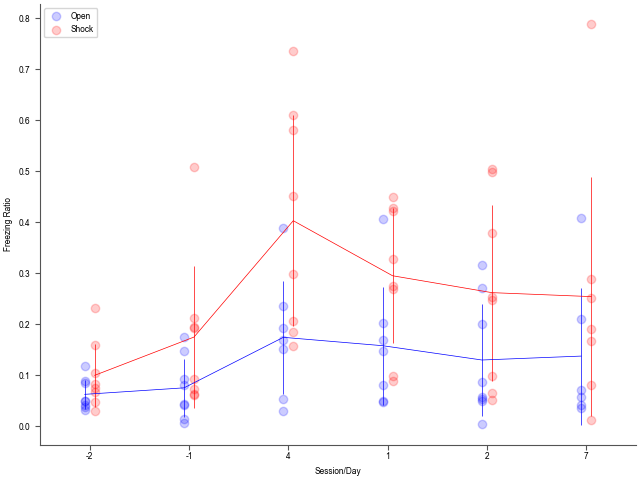

In [103]:
_, _, df_frz2 = erp.plot_all_freezing(err.control_mice_good, days=days, return_df=True)
df_frz2["Group"] = df_frz2.apply(get_group, axis=1)  # Add in group names

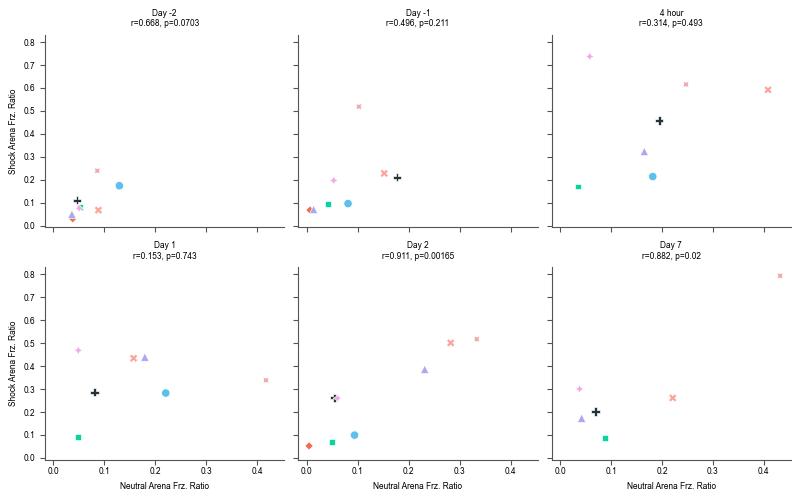

In [105]:
fig, ax = plt.subplots(2, 3, figsize=(8,5), tight_layout=True, sharex=True, sharey=True)
# sns.set(font_scale=1)
for day, a in zip(days, ax.reshape(-1)):
    df_day = df_frz[df_frz.Day == day]
    sns.scatterplot(data=df_day, x="Open", y="Shock", style="Mouse", hue="Mouse", ax=a, legend=False)
    a.set_xlabel("Neutral Arena Frz. Ratio")
    a.set_ylabel("Shock Arena Frz. Ratio")
    # a.set_xticklabels(a.get_xticklabels(), fontsize=10)

    # Run stats
    df_good = df_day[~np.isnan(df_day.Open)]
    res = s.linregress(df_good.Open, df_good.Shock)
    day_str = " ".join(["Day", str(day)]) if day != 4 else "4 hour"
    a.set_title(f"{day_str}\nr={res.rvalue:.3g}, p={res.pvalue:.3g}")
    
sns.despine(fig=fig)

In [106]:
def fix_xlabels(axbad, session_names=True, rotate=False):
    if session_names:
        axbad.set_xticks(axbad.get_xticks())
        axbad.set_xticklabels([f"Day {_.get_text()}" if _.get_text() != '4' else "4 Hour" for _ in axc.get_xticklabels()], ha="right")
    if rotate:
        axbad.tick_params(axis="x", labelrotation=30)
    axbad.set_xlabel('Session')

[8.5 6.5]


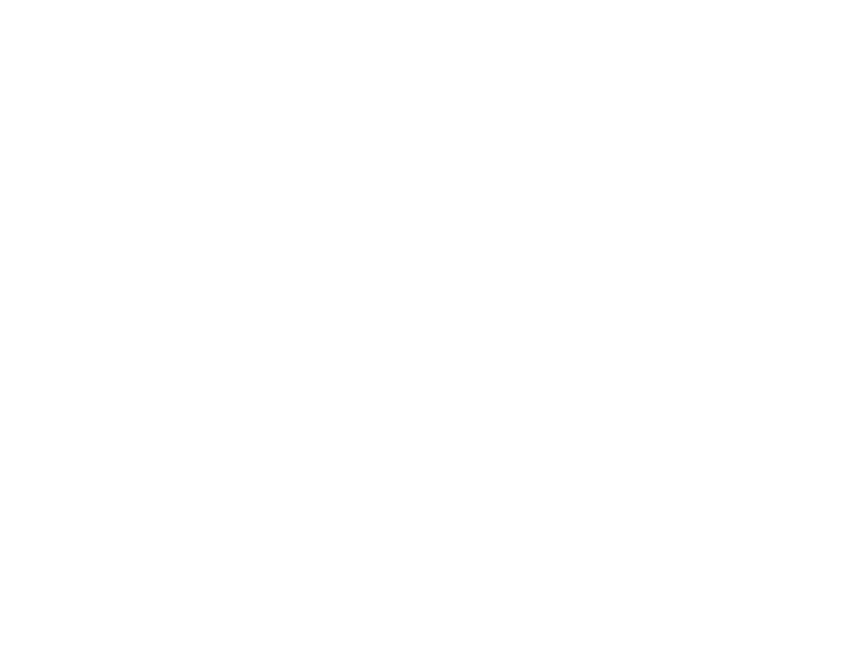

In [107]:
# %matplotlib ipympl
FigR1 = Fig(num="Reviewer1", grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(FigR1.fig.get_size_inches())

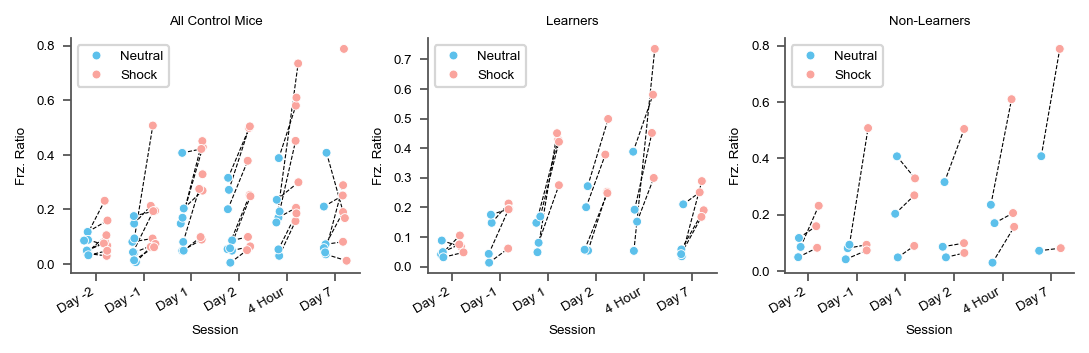

In [108]:
# figcc, axcc = plt.subplots(1, 3, figsize=(12, 3.5), tight_layout=True)
from plotting import fix_open_legend
aall = FigR1.subplot(441)
alrn = FigR1.subplot(442)
anl = FigR1.subplot(443)
figcc, axcc = FigR1.fig, [aall, alrn, anl]

axc = axcc[0]
sns.stripplot(data=df_frz2, x='Day', y ='Frz. Ratio', hue="Arena", dodge=True, size=4, linewidth=0.4, edgecolor='w', ax=axc)

for idd, day in enumerate(days):
    for (x0, y0), (x1, y1) in zip(axc.collections[idd*2].get_offsets(), axc.collections[idd*2+1].get_offsets()):
        axc.plot([x0, x1], [y0, y1], ls='--', color='black')
axc.set_title("All Control Mice")

for axc, grp in zip(axcc[1:], ["Learners", "Non-Learners"]):
    df_use = df_frz2[df_frz2.Group == grp]
    sns.stripplot(data=df_use, x='Day', y ='Frz. Ratio', hue="Arena", dodge=True, size=4, linewidth=0.4, edgecolor='w', ax=axc)

    for idd, day in enumerate(days):
        for (x0, y0), (x1, y1) in zip(axc.collections[idd*2].get_offsets(), axc.collections[idd*2+1].get_offsets()):
            axc.plot([x0, x1], [y0, y1], ls='--', color='black')
    axc.set_title(grp)

[fix_xlabels(axc, rotate=30) for axc in axcc];

sns.despine(fig=figcc)
fix_open_legend(axcc)
FigR1.fig

## Save Figures

In [109]:
Fig1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1'), scriptname='Figure1Notebook')

In [110]:
Fig1stats.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1stats'), scriptname='Figure1Notebook')

/Users/nkinsky/Documents/BU/GitHub/Eraser/plotting.py:270: UserWarning: Glyph 27 () missing from current font.
  fig.savefig(filename, dpi=dpi, backend="pdf")


In [111]:
FigS1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/FigS1'), scriptname='Figure1Notebook')

In [112]:
FigS1stats.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/FigS1stats'), scriptname='Figure1Notebook')


In [114]:
FigR1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/FigR1_generalized_freezing'), scriptname='Figure1Notebook')